### 無敵的吧
110065536 陳俊元

110062645 王昱文

107021115 錢珈鋒

## What kind of models you have tried and how did they work.

我們一開始先使用原本單純的CNN model，像是加上convolution和基本的maxpooling等等，但是效果很差

於是我們使用了以下知名的model，但我們train from scratch 並沒有load pretrain。
<ol>
<li>Xception</li>
<li>ResNet121</li>
<li>ResNet164</li>
</ol>



而後來我們自己改了model後面的classifier，加上了dropout，因為我們覺得model可能會學到很多不該學的feature，希望透過dropout把這些feature遺忘。

發現效果不錯，於是我們開始繼續使用preprocess


## Anything you've done and want to tell us.

我們在preprocess上面得到的改進比較多，以下是我們使用的preprocess




- [ ] up_down_sample
- [x] rgb2gray
- [x] Sobel


**rgb2gray**

也就是單純把圖片從彩色的RBG變成黑灰階的一維圖片，因為我們覺得老師的演算法可能對於圖片的色彩有一些攻擊，如果轉成灰色的也許會有一點幫助，最後發現效果還不錯，但是仍然沒有很好

**up_down_sample**

同樣的邏輯，因此我們試著將圖片放大再縮小，但是這個效果有點差

**Sobel**
[邊緣偵測 - 索伯算子 ( Sobel Operator )](https://medium.com/%E9%9B%BB%E8%85%A6%E8%A6%96%E8%A6%BA/%E9%82%8A%E7%B7%A3%E5%81%B5%E6%B8%AC-%E7%B4%A2%E4%BC%AF%E7%AE%97%E5%AD%90-sobel-operator-95ca51c8d78a)

這也是我們效果有最大改進的一個演算法，我們先將圖片轉成灰階，並且利用Sobel接著就可以在imagenet得到巨大的改進，但值得注意的是我們在cifar10上面並沒有得到太大的效果，我們猜測是因為本來就已經32*32再透過這個處理會讓他變得更加的模糊，這邊kernel的參數我們使用3

以下為某圖片經過Sobel的範例


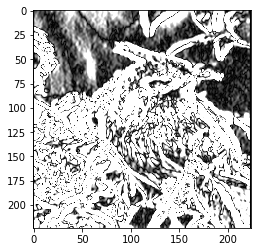

In [5]:
from IPython.display import Image
Image(filename='./SobelExample.png') 

##  What problems occurred and how did you solve them.

仔細看懂老師的code之後，我們發現應該是要利用類似於老師的演算法去處理圖片，例如讓一個model自己去學怎麼把圖片恢復回去，同樣解決bilevel的問題，但我們不知道技術上要如何實作
因為我們都以處理圖片的角度去解決這個問題，雖然imagenet得到不錯的成績，然而cifar10的成績比較差，因此我們猜測這樣的結果算是運氣好，並不是真正解決此問題。

  而且我們在training的過程中，val的acc非常的不規律，並不是正常的training process，猜測同樣也是因為解決問題的方法並不嚴謹。